In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import sleep
import os
import warnings
import pywt
import tensorflow as tf
import keras
import sklearn
from tensorflow.keras import optimizers
from tensorflow.keras import layers
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Bidirectional
from keras.layers import Embedding
from keras.layers import LSTM
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,accuracy_score,precision_score,recall_score,f1_score
from scipy.stats import skew, kurtosis
from keras.layers import Conv1D

In [2]:
dirA="./Datasets/setA/"
tempA=[]
for file in os.listdir(dirA):
    fl = dirA + file
    tempA.append(fl)
tempA = sorted(tempA)

dirB="./Datasets/setB/"
tempB=[]
for file in os.listdir(dirB):
    fl = dirB + file
    tempB.append(fl)
tempB = sorted(tempB)

dirC="./Datasets/setC/"
tempC=[]
for file in os.listdir(dirC):
    fl = dirC + file
    tempC.append(fl)
tempC = sorted(tempC)

dirD="./Datasets/setD/"
tempD=[]
for file in os.listdir(dirD):
    fl = dirD + file
    tempD.append(fl)
tempD = sorted(tempD)

dirE="./Datasets/setE/"
tempE=[]
for file in os.listdir(dirE):
    fl = dirE + file
    tempE.append(fl)
tempE = sorted(tempE)

In [3]:
ta=[]
st = 'A'
for i in range(len(tempA)):
    x = pd.read_table(tempA[i],header=None)
    x.columns=[st+str(i)]
    ta.append(x)

tb=[]
st = 'A'
for i in range(len(tempB)):
    x = pd.read_table(tempB[i],header=None)
    x.columns=[st+str(i)]
    tb.append(x)

tc=[]
st = 'A'
for i in range(len(tempC)):
    x = pd.read_table(tempC[i],header=None)
    x.columns=[st+str(i)]
    tc.append(x)
    
td=[]
st = 'A'
for i in range(len(tempD)):
    x = pd.read_table(tempD[i],header=None)
    x.columns=[st+str(i)]
    td.append(x)
    
te=[]
st = 'A'
for i in range(len(tempE)):
    x = pd.read_table(tempE[i],header=None)
    x.columns=[st+str(i)]
    te.append(x)

In [4]:
def table(table):
    big_table=None
    for tf in table:
        big_table=pd.concat([big_table,tf],axis=1)
    return big_table

In [5]:
bigA=table(ta)
bigB=table(tb)
bigC=table(tc)
bigD=table(td)
bigE=table(te)

head=list(bigA.columns.values)

In [6]:
def creat_mat(mat):
    matx = np.zeros((len(mat),(len(head))))
    for i in range(len(head)):
        matx[:,i] = mat[head[i]]
        sleep(0.01)
    return matx

In [7]:
matA = creat_mat(bigA)
matB = creat_mat(bigB)
matC = creat_mat(bigC)
matD = creat_mat(bigD)
matE = creat_mat(bigE) 

matA = np.nan_to_num(matA)
matB = np.nan_to_num(matB)
matC = np.nan_to_num(matC)
matD = np.nan_to_num(matD)
matE = np.nan_to_num(matE)

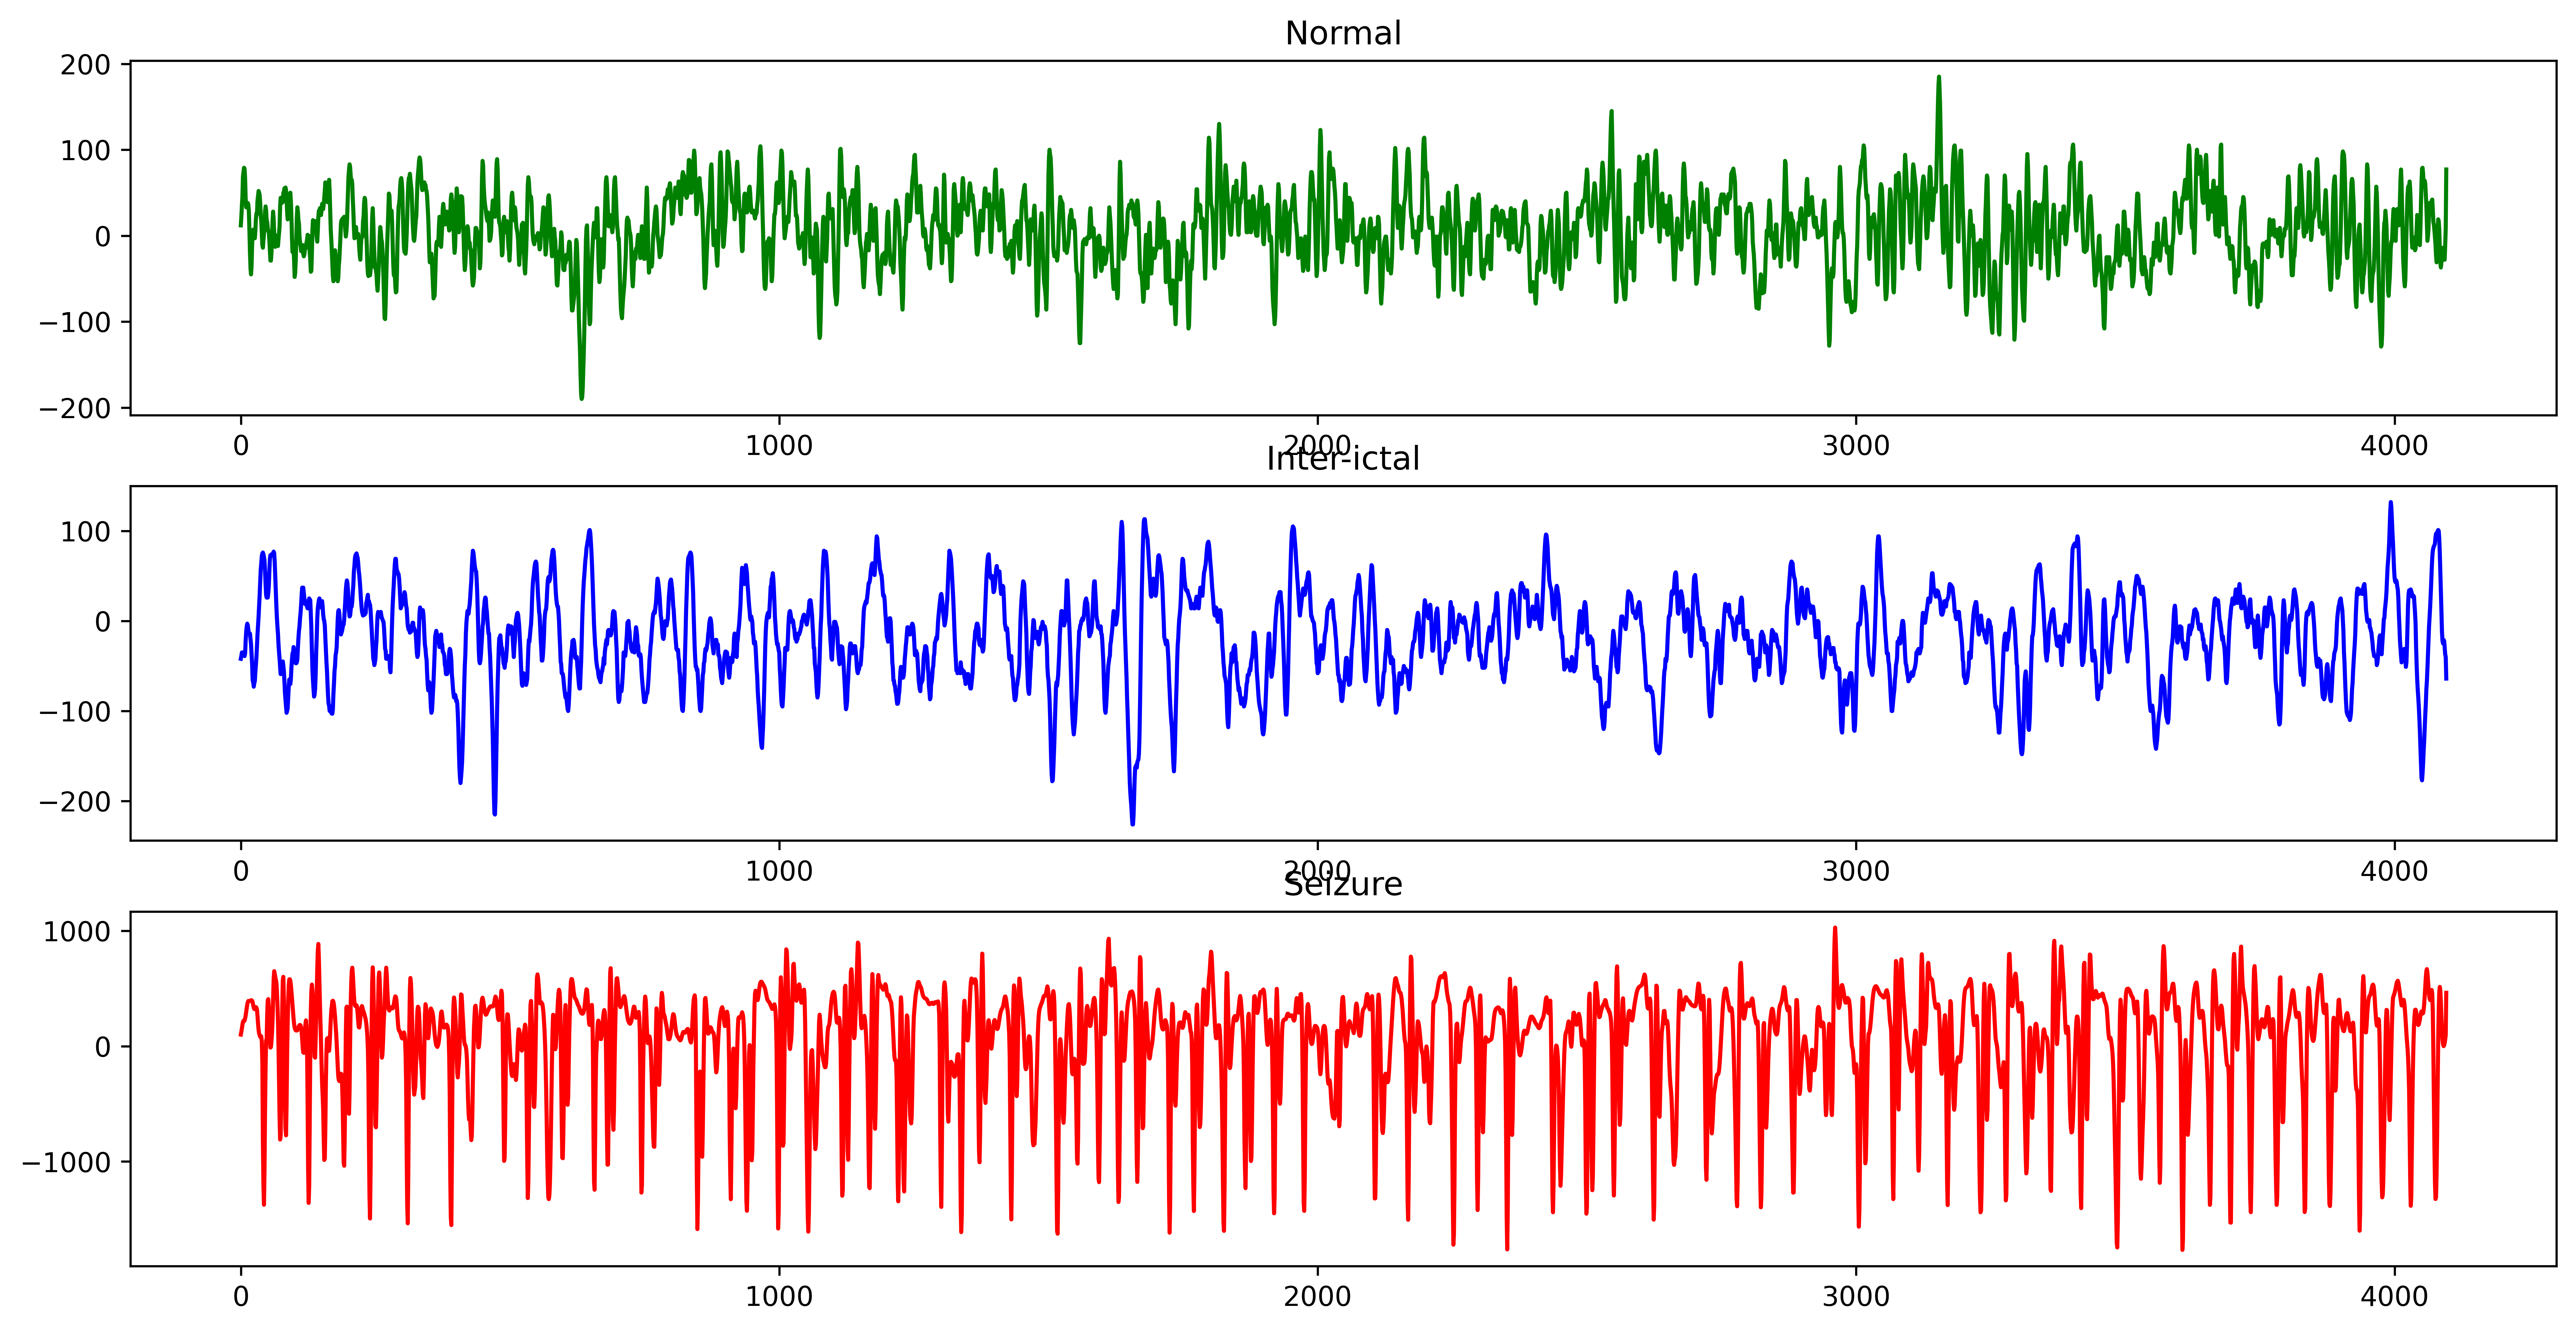

In [8]:
samples=np.arange(0,4097,1)
plt.figure(figsize=(16,8),dpi=600)
plt.subplot(3,1,1)
plt.title('Normal')
plt.plot(samples,matA[:,0],label='Normal',color='green')
plt.subplot(3,1,2)
plt.title('Inter-ictal')
plt.plot(samples,matC[:,0],label='Inter-ictal',color='blue')
plt.subplot(3,1,3)
plt.title('Seizure')
plt.plot(samples,matE[:,0],label='Seizure',color='red')
plt.show()

In [9]:
matN_out = np.zeros((1,100))
X_data_N = np.concatenate((matA,matN_out), axis = 0) 
print(X_data_N.shape)

(4098, 100)


In [10]:
matI_out = np.ones((1,100))
X_data_I = np.concatenate((matC,matI_out), axis = 0) 
print(X_data_I.shape)

(4098, 100)


In [11]:
matS_out = np.full((1,100),[2])
X_data_S = np.concatenate((matE,matS_out), axis = 0) 
print(X_data_S.shape)

(4098, 100)


In [12]:
data = np.concatenate((X_data_N,X_data_I,X_data_S), axis =1)
data = data.T
c = 'A'
col = []
sig = []
for i in range(np.size(data,1)-1):
    col.append(st+str(i))
for i in range(np.size(data,0)):
    sig.append('S'+str(i))
col.append('out')
TotalData = pd.DataFrame(data, columns=col, index= sig)

In [13]:
TotalData

,A0,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,A4088,A4089,A4090,A4091,A4092,A4093,A4094,A4095,A4096,out
S0,12.0,22.0,35.0,45.0,69.0,74.0,79.0,78.0,66.0,43.0,...,-28.0,-21.0,-14.0,-14.0,-25.0,-28.0,-11.0,8.0,77.0,0.0
S1,-56.0,-50.0,-64.0,-91.0,-135.0,-140.0,-134.0,-114.0,-115.0,-126.0,...,-82.0,-114.0,-138.0,-159.0,-172.0,-180.0,-173.0,-162.0,-82.0,0.0
S2,-37.0,-22.0,-17.0,-24.0,-31.0,-20.0,-5.0,14.0,31.0,31.0,...,-52.0,-23.0,-14.0,-5.0,-3.0,7.0,3.0,4.0,82.0,0.0
S3,-31.0,-43.0,-39.0,-39.0,-9.0,-5.0,18.0,7.0,-12.0,-42.0,...,-32.0,-40.0,-23.0,-1.0,11.0,12.0,-6.0,10.0,33.0,0.0
S4,14.0,26.0,32.0,25.0,16.0,8.0,8.0,12.0,11.0,19.0,...,-19.0,-29.0,-35.0,-51.0,-55.0,-58.0,-32.0,-6.0,-17.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
S295,-40.0,-58.0,-75.0,-88.0,-89.0,-81.0,-67.0,-52.0,-28.0,14.0,...,32.0,32.0,18.0,6.0,-3.0,-10.0,-13.0,-16.0,-151.0,2.0
S296,187.0,44.0,-147.0,-368.0,-550.0,-657.0,-665.0,-581.0,-442.0,-290.0,...,510.0,562.0,607.0,667.0,748.0,763.0,703.0,446.0,-537.0,2.0
S297,-438.0,-561.0,-622.0,-581.0,-460.0,-295.0,-164.0,-70.0,3.0,66.0,...,443.0,399.0,319.0,196.0,40.0,-47.0,-118.0,-163.0,-56.0,2.0
S298,-476.0,-518.0,-521.0,-362.0,-68.0,175.0,289.0,184.0,15.0,-130.0,...,-261.0,-248.0,-147.0,36.0,224.0,299.0,246.0,556.0,276.0,2.0


In [14]:
df = TotalData.drop(['out'], axis =1)
target = TotalData['out']

In [15]:
final_values = []

In [16]:
filters = pywt.wavelist('bior')
print(filters)
print(len(filters))
level =5
w_name = 'bior6.8'

['bior1.1', 'bior1.3', 'bior1.5', 'bior2.2', 'bior2.4', 'bior2.6', 'bior2.8', 'bior3.1', 'bior3.3', 'bior3.5', 'bior3.7', 'bior3.9', 'bior4.4', 'bior5.5', 'bior6.8']
15


In [17]:
w = pywt.Wavelet(w_name)
temp_cA = []
temp_cD5 = []
temp_cD4 = []
temp_cD3 = []
temp_cD2 = []
temp_cD1 = []
for i in matA.T:
  cA,cD5,cD4,cD3,cD2,cD1 = pywt.wavedec(i, w, mode='constant', level=level)
  temp_cA.append(cA)
  temp_cD1.append(cD1)
  temp_cD2.append(cD2)
  temp_cD3.append(cD3)
  temp_cD4.append(cD4)
  temp_cD5.append(cD5)
coeff_cA = np.array(temp_cA)
coeff_cD1 = np.array(temp_cD1)
coeff_cD2 = np.array(temp_cD2)
coeff_cD3 = np.array(temp_cD3)
coeff_cD4 = np.array(temp_cD4)
coeff_cD5 = np.array(temp_cD5)

In [18]:
w = pywt.Wavelet(w_name)
temp_cA_I = []
temp_cD5_I = []
temp_cD4_I = []
temp_cD3_I = []
temp_cD2_I = []
temp_cD1_I = []
for i in matC.T:
  cA_I,cD5_I,cD4_I,cD3_I,cD2_I,cD1_I = pywt.wavedec(i, w, mode='constant', level=level)
  temp_cA_I.append(cA_I)
  temp_cD3_I.append(cD3_I)
  temp_cD4_I.append(cD4_I)
  temp_cD5_I.append(cD5_I)
  temp_cD2_I.append(cD2_I)
  temp_cD1_I.append(cD1_I)
coeff_cA_I  = np.array(temp_cA_I)
coeff_cD5_I = np.array(temp_cD5_I)
coeff_cD4_I = np.array(temp_cD4_I)
coeff_cD3_I = np.array(temp_cD3_I)
coeff_cD2_I = np.array(temp_cD2_I)
coeff_cD1_I = np.array(temp_cD1_I)

In [19]:
w = pywt.Wavelet(w_name)
temp_cA_S = []
temp_cD5_S = []
temp_cD4_S = []
temp_cD3_S = []
temp_cD2_S = []
temp_cD1_S = []
for i in matE.T:
  cA_S,cD5_S,cD4_S,cD3_S,cD2_S,cD1_S = pywt.wavedec(i, w, mode='constant', level=level)
  temp_cA_S.append(cA_S)
  temp_cD3_S.append(cD3_S)
  temp_cD4_S.append(cD4_S)
  temp_cD5_S.append(cD5_S)
  temp_cD2_S.append(cD2_S)
  temp_cD1_S.append(cD1_S)
coeff_cA_S = np.array(temp_cA_S)
coeff_cD5_S = np.array(temp_cD5_S)
coeff_cD4_S = np.array(temp_cD4_S)
coeff_cD3_S = np.array(temp_cD3_S)
coeff_cD2_S = np.array(temp_cD2_S)
coeff_cD1_S = np.array(temp_cD1_S)

In [20]:
#Seizure
print(coeff_cA_S.shape)
print(coeff_cD5_S.shape)
print(coeff_cD4_S.shape)
print(coeff_cD3_S.shape)
print(coeff_cD2_S.shape)
print(coeff_cD1_S.shape)

#Interictal
print(coeff_cA_I.shape)
print(coeff_cD5_I.shape)
print(coeff_cD4_I.shape)
print(coeff_cD3_I.shape)
print(coeff_cD2_I.shape)
print(coeff_cD1_I.shape)

#Normal
print(coeff_cA.shape)
print(coeff_cD5.shape)
print(coeff_cD4.shape)
print(coeff_cD3.shape)
print(coeff_cD2.shape)
print(coeff_cD1.shape)

(100, 144)
(100, 144)
(100, 272)
(100, 527)
(100, 1037)
(100, 2057)
(100, 144)
(100, 144)
(100, 272)
(100, 527)
(100, 1037)
(100, 2057)
(100, 144)
(100, 144)
(100, 272)
(100, 527)
(100, 1037)
(100, 2057)


In [21]:
coeff_cA_total = np.concatenate([coeff_cA, coeff_cA_I,coeff_cA_S])
coeff_cD1_total = np.concatenate([coeff_cD1, coeff_cD1_I,coeff_cD1_S])
coeff_cD2_total = np.concatenate([coeff_cD2, coeff_cD2_I,coeff_cD2_S])
coeff_cD3_total = np.concatenate([coeff_cD3, coeff_cD3_I,coeff_cD3_S])
coeff_cD4_total = np.concatenate([coeff_cD4, coeff_cD4_I,coeff_cD4_S])
coeff_cD5_total = np.concatenate([coeff_cD5, coeff_cD5_I,coeff_cD5_S])

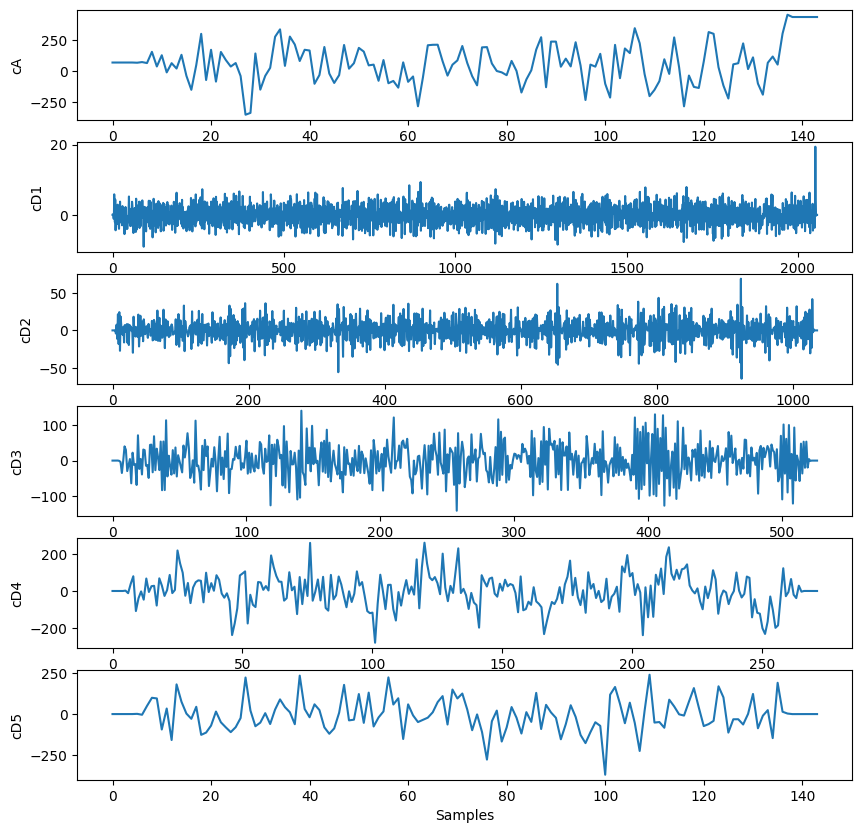

In [22]:
plt.figure(figsize=(10,10))
plt.subplot(level+1,1,1)
plt.ylabel('cA')
plt.xlabel('Samples')
plt.plot(np.arange(0,len(coeff_cA_total[0]),1),coeff_cA_total[0,:].T)

plt.subplot(level+1,1,2)
plt.ylabel('cD1')
plt.xlabel('Samples')
plt.plot(np.arange(0,len(coeff_cD1_total[0]),1),coeff_cD1_total[0,:].T)

plt.subplot(level+1,1,3)
plt.ylabel('cD2')
plt.xlabel('Samples')
plt.plot(np.arange(0,len(coeff_cD2_total[0]),1),coeff_cD2_total[0,:].T)

plt.subplot(level+1,1,4)
plt.ylabel('cD3')
plt.xlabel('Samples')
plt.plot(np.arange(0,len(coeff_cD3_total[0]),1),coeff_cD3_total[0,:].T)

plt.subplot(level+1,1,5)
plt.ylabel('cD4')
plt.xlabel('Samples')
plt.plot(np.arange(0,len(coeff_cD4_total[0]),1),coeff_cD4_total[0,:].T)

plt.subplot(level+1,1,6)
plt.ylabel('cD5')
plt.xlabel('Samples')
plt.plot(np.arange(0,len(coeff_cD5_total[0]),1),coeff_cD5_total[0,:].T)

plt.show()

In [23]:
feature_size = 4
columns_name = list()
for i in range(feature_size):
    columns_name = columns_name + ['f'+str(i+1)]
columns_name = columns_name + ['class']

In [24]:
def build_features(mat):
    lis = list()
    lis = lis + [kurtosis(mat)]
    lis = lis + [np.var(mat)]
    lis = lis + [skew(mat)]
    lis = lis + [np.std(mat)]
    sleep(0.01)
             
    return lis

In [25]:
# create features of class I and cA
f1_cA_N    = np.zeros((100,1))
f2_cA_N    = np.zeros((100,1))
f3_cA_N    = np.zeros((100,1))
f4_cA_N    = np.zeros((100,1))

for i in range(100):
    [f1_cA_N[i,0],f2_cA_N[i,0],f3_cA_N[i,0],f4_cA_N[i,0]]=build_features(coeff_cA.T[:,i])

# # create features of class I and cD1
# f1_cD1_N    = np.zeros((100,1))
# f2_cD1_N    = np.zeros((100,1))
# f3_cD1_N    = np.zeros((100,1))
# f4_cD1_N    = np.zeros((100,1))

# for i in range(100):
#     [f1_cD1_N[i,0],f2_cD1_N[i,0],f3_cD1_N[i,0],f4_cD1_N[i,0]]=build_features(coeff_cD1.T[:,i])
  
# create features of class I and cD1
f1_cD2_N   = np.zeros((100,1))
f2_cD2_N   = np.zeros((100,1))
f3_cD2_N   = np.zeros((100,1))
f4_cD2_N   = np.zeros((100,1))

for i in range(100):
    [f1_cD2_N[i,0],f2_cD2_N[i,0],f3_cD2_N[i,0],f4_cD2_N[i,0]]=build_features(coeff_cD2.T[:,i])

# create features of class I and cD3
f1_cD3_N   = np.zeros((100,1))
f2_cD3_N   = np.zeros((100,1))
f3_cD3_N   = np.zeros((100,1))
f4_cD3_N   = np.zeros((100,1))

for i in range(100):
    [f1_cD3_N[i,0],f2_cD3_N[i,0],f3_cD3_N[i,0],f4_cD3_N[i,0]]=build_features(coeff_cD3.T[:,i])

# create features of class I and cD4
f1_cD4_N   = np.zeros((100,1))
f2_cD4_N   = np.zeros((100,1))
f3_cD4_N   = np.zeros((100,1))
f4_cD4_N   = np.zeros((100,1))

for i in range(100):
    [f1_cD4_N[i,0],f2_cD4_N[i,0],f3_cD4_N[i,0],f4_cD4_N[i,0]]=build_features(coeff_cD4.T[:,i])
    
# create features of class I and cD5
f1_cD5_N   = np.zeros((100,1))
f2_cD5_N   = np.zeros((100,1))
f3_cD5_N   = np.zeros((100,1))
f4_cD5_N   = np.zeros((100,1))

for i in range(100):
    [f1_cD5_N[i,0],f2_cD5_N[i,0],f3_cD5_N[i,0],f4_cD5_N[i,0]]=build_features(coeff_cD5.T[:,i])

In [26]:
# create features of class II (INTERICTAL and cA)
f1_cA_I    = np.zeros((100,1))
f2_cA_I    = np.zeros((100,1))
f3_cA_I    = np.zeros((100,1))
f4_cA_I    = np.zeros((100,1))

for i in range(100):
    [f1_cA_I[i,0],f2_cA_I[i,0],f3_cA_I[i,0],f4_cA_I[i,0]]=build_features(coeff_cA_I.T[:,i])

# # create features of class II (INTERICTAL and cD1)
# f1_cD1_I    = np.zeros((100,1))
# f2_cD1_I    = np.zeros((100,1))
# f3_cD1_I    = np.zeros((100,1))
# f4_cD1_I    = np.zeros((100,1))

# for i in range(100):
#     [f1_cD1_I[i,0],f2_cD1_I[i,0],f3_cD1_I[i,0],f4_cD1_I[i,0]]=build_features(coeff_cD1_I.T[:,i])

# create features of class II (INTERICTAL and cD2)
f1_cD2_I    = np.zeros((100,1))
f2_cD2_I    = np.zeros((100,1))
f3_cD2_I    = np.zeros((100,1))
f4_cD2_I    = np.zeros((100,1))

for i in range(100):
    [f1_cD2_I[i,0],f2_cD2_I[i,0],f3_cD2_I[i,0],f4_cD2_I[i,0]]=build_features(coeff_cD2_I.T[:,i])
    
# create features of class II (INTERICTAL and cD3)
f1_cD3_I    = np.zeros((100,1))
f2_cD3_I    = np.zeros((100,1))
f3_cD3_I    = np.zeros((100,1))
f4_cD3_I    = np.zeros((100,1))


for i in range(100):
    [f1_cD3_I[i,0],f2_cD3_I[i,0],f3_cD3_I[i,0],f4_cD3_I[i,0]]=build_features(coeff_cD3_I.T[:,i])
    

# create features of class II (INTERICTAL and cD4)
f1_cD4_I    = np.zeros((100,1))
f2_cD4_I    = np.zeros((100,1))
f3_cD4_I    = np.zeros((100,1))
f4_cD4_I    = np.zeros((100,1))

for i in range(100):
    [f1_cD4_I[i,0],f2_cD4_I[i,0],f3_cD4_I[i,0],f4_cD4_I[i,0]]=build_features(coeff_cD4_I.T[:,i])

# create features of class II (INTERICTAL and cD5)
f1_cD5_I    = np.zeros((100,1))
f2_cD5_I    = np.zeros((100,1))
f3_cD5_I    = np.zeros((100,1))
f4_cD5_I    = np.zeros((100,1))

for i in range(100):
    [f1_cD5_I[i,0],f2_cD5_I[i,0],f3_cD5_I[i,0],f4_cD5_I[i,0]]=build_features(coeff_cD5_I.T[:,i])

In [27]:
# create features of class III (SEIZURE and cA)
f1_cA_S    = np.zeros((100,1))
f2_cA_S    = np.zeros((100,1))
f3_cA_S    = np.zeros((100,1))
f4_cA_S    = np.zeros((100,1))

for i in range(100):
    [f1_cA_S[i,0],f2_cA_S[i,0],f3_cA_S[i,0],f4_cA_S[i,0]]=build_features(coeff_cA_S.T[:,i])

# # create features of class III (SEIZURE and cD1)
# f1_cD1_S    = np.zeros((100,1))
# f2_cD1_S    = np.zeros((100,1))
# f3_cD1_S    = np.zeros((100,1))
# f4_cD1_S    = np.zeros((100,1))

# for i in range(100):
#     [f1_cD1_S[i,0],f2_cD1_S[i,0],f3_cD1_S[i,0],f4_cD1_S[i,0]]=build_features(coeff_cD1_S.T[:,i])

# create features of class III (SEIZURE and cD2)
f1_cD2_S    = np.zeros((100,1))
f2_cD2_S    = np.zeros((100,1))
f3_cD2_S    = np.zeros((100,1))
f4_cD2_S    = np.zeros((100,1))

for i in range(100):
    [f1_cD2_S[i,0],f2_cD2_S[i,0],f3_cD2_S[i,0],f4_cD2_S[i,0]]=build_features(coeff_cD2_S.T[:,i])
    
# create features of class III (SEIZURE and cD3)
f1_cD3_S    = np.zeros((100,1))
f2_cD3_S    = np.zeros((100,1))
f3_cD3_S    = np.zeros((100,1))
f4_cD3_S    = np.zeros((100,1))


for i in range(100):
    [f1_cD3_S[i,0],f2_cD3_S[i,0],f3_cD3_S[i,0],f4_cD3_S[i,0]]=build_features(coeff_cD3_S.T[:,i])
    

# create features of class III (SEIZURE and cD4)
f1_cD4_S    = np.zeros((100,1))
f2_cD4_S    = np.zeros((100,1))
f3_cD4_S    = np.zeros((100,1))
f4_cD4_S    = np.zeros((100,1))

for i in range(100):
    [f1_cD4_S[i,0],f2_cD4_S[i,0],f3_cD4_S[i,0],f4_cD4_S[i,0]]=build_features(coeff_cD4_S.T[:,i])

# create features of class III (SEIZURE and cD5)
f1_cD5_S    = np.zeros((100,1))
f2_cD5_S    = np.zeros((100,1))
f3_cD5_S    = np.zeros((100,1))
f4_cD5_S    = np.zeros((100,1))

for i in range(100):
    [f1_cD5_S[i,0],f2_cD5_S[i,0],f3_cD5_S[i,0],f4_cD5_S[i,0]]=build_features(coeff_cD5_S.T[:,i])

In [28]:
cl_N  = np.zeros((100,1))
cl_I  = np.ones((100,1))
cl_S  = np.full((100,1),[2])

In [29]:
MftN = np.concatenate([f1_cA_N, f2_cA_N, f3_cA_N, f4_cA_N,f1_cD2_N,f2_cD2_N,f3_cD2_N,f4_cD2_N,f1_cD3_N,f2_cD3_N,f3_cD3_N,f4_cD3_N,f1_cD4_N,f2_cD4_N,f3_cD4_N,f4_cD4_N,f1_cD5_N,f2_cD5_N,f3_cD5_N,f4_cD5_N,cl_N], axis=1)

MftI = np.concatenate([f1_cA_I, f2_cA_I, f3_cA_I, f4_cA_I,f1_cD2_I,f2_cD2_I,f3_cD2_I,f4_cD2_I,f1_cD3_I,f2_cD3_I,f3_cD3_I,f4_cD3_I,f1_cD4_I,f2_cD4_I,f3_cD4_I,f4_cD4_I,f1_cD5_I,f2_cD5_I,f3_cD5_I,f4_cD5_I,cl_I], axis=1)

MftS = np.concatenate([f1_cA_S, f2_cA_S, f3_cA_S, f4_cA_S,f1_cD2_S,f2_cD2_S,f3_cD2_S,f4_cD2_S,f1_cD3_S,f2_cD3_S,f3_cD3_S,f4_cD3_S,f1_cD4_S,f2_cD4_S,f3_cD4_S,f4_cD4_S,f1_cD5_S,f2_cD5_S,f3_cD5_S,f4_cD5_S,cl_S], axis=1)

In [30]:
FCM_N  = pd.DataFrame(MftN,columns=['f1','f2','f3','f4','f5','f6','f7','f8','f9','f10','f11','f12','f13','f14','f15','f16','f17','f18','f19','f20','class'])

FCM_I  = pd.DataFrame(MftI,columns=['f1','f2','f3','f4','f5','f6','f7','f8','f9','f10','f11','f12','f13','f14','f15','f16','f17','f18','f19','f20','class'])

FCM_S  = pd.DataFrame(MftS,columns=['f1','f2','f3','f4','f5','f6','f7','f8','f9','f10','f11','f12','f13','f14','f15','f16','f17','f18','f19','f20','class'])

In [31]:
TotalDataset = pd.concat([FCM_N,FCM_I,FCM_S],ignore_index=True)
print(TotalDataset.shape)

(300, 21)


In [32]:
TotalDataset

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f12,f13,f14,f15,f16,f17,f18,f19,f20,class
0,0.108245,26896.946146,0.180087,164.002885,0.421660,251.299470,-0.019135,15.852428,-0.149486,2419.199448,...,49.185358,0.708480,8.041295e+03,-0.083685,89.673266,1.212075,9.253948e+03,-0.086192,96.197445,0.0
1,0.787418,21106.732364,-0.256362,145.281562,0.742664,436.968287,0.102038,20.903786,0.456488,5077.118386,...,71.253901,1.145642,1.049237e+04,-0.322578,102.432246,0.495532,9.391392e+03,0.074513,96.909196,0.0
2,-0.272045,40515.370437,0.288818,201.284303,0.010066,260.102191,0.061738,16.127684,0.545212,3535.318022,...,59.458540,1.004409,7.987848e+03,-0.192998,89.374759,0.465888,8.766188e+03,-0.136853,93.627921,0.0
3,-0.403169,17189.956699,0.091119,131.110475,0.426410,854.918993,0.043052,29.238998,0.584359,4706.881041,...,68.606713,0.116560,9.869491e+03,-0.233202,99.345312,0.796927,8.434608e+03,0.001489,91.840121,0.0
4,-0.353603,26665.164541,0.158446,163.294717,0.198191,302.345942,-0.025963,17.388098,0.507000,3385.450774,...,58.184627,2.300457,7.703034e+03,-0.474733,87.766931,1.925468,5.749143e+03,-0.307106,75.823107,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.028449,66994.412903,-0.268011,258.832789,1.741984,542.745021,0.084478,23.296889,1.107116,11519.664003,...,107.329698,0.137633,8.766333e+04,-0.202194,296.079931,-0.053005,8.761855e+04,-0.078436,296.004300,2.0
296,7.419910,606613.111601,-2.362048,778.853716,3.704382,6906.524512,0.168035,83.105502,-0.155327,312367.040378,...,558.898059,-1.078590,2.635880e+06,0.231354,1623.539427,-0.366410,2.519531e+06,0.004781,1587.302984,2.0
297,9.282992,377550.456151,-3.048808,614.451346,0.183105,3465.366887,0.205477,58.867367,-0.817795,125160.712824,...,353.780600,-0.801304,7.243088e+05,0.469640,851.063317,-0.705510,6.211164e+05,-0.131898,788.109373,2.0
298,1.756805,897729.465603,-1.020569,947.485866,2.661279,26461.421960,-0.349106,162.669671,0.877924,390979.289305,...,625.283367,-0.707033,9.077157e+05,-0.317323,952.741167,-0.424922,6.555139e+05,-0.118702,809.638144,2.0


In [33]:
X = TotalDataset[['f1','f2','f3','f4','f5','f6','f7','f8','f9','f10','f11','f12','f13','f14','f15','f16','f17','f18','f19','f20']]
y = TotalDataset[['class']]
X = np.asarray(X)
y = np.asarray(y)

In [34]:
from keras.utils import to_categorical
from numpy import array

In [35]:
y=to_categorical(y)

In [36]:
print(y)

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1.

In [37]:
y = np.argmax(y, axis=-1)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [39]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(240, 20)
(60, 20)
(240,)
(60,)


In [40]:
X_train=X_train.reshape(X_train.shape[0],20,1)
y_train=y_train.reshape(y_train.shape[0],1)
X_test=X_test.reshape(X_test.shape[0],20,1)
y_test=y_test.reshape(y_test.shape[0],1)

In [41]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(240, 20, 1)
(60, 20, 1)
(240, 1)
(60, 1)


In [43]:
from keras.layers import Conv1D 
from keras.layers import GlobalMaxPooling1D
from keras.layers import Bidirectional

In [44]:
model = Sequential()
model.add(LSTM(300, return_sequences=True, input_shape=(20,1)))
model.add(Conv1D(300, kernel_size=5, activation = 'relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(150))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer = 'adam', loss ='sparse_categorical_crossentropy', metrics = ['accuracy'])
print(model.summary())
history=model.fit(X_train, y_train, batch_size = 64, epochs = 100)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 20, 300)           362400    
                                                                 
 conv1d (Conv1D)             (None, 16, 300)           450300    
                                                                 
 global_max_pooling1d (Glob  (None, 300)               0         
 alMaxPooling1D)                                                 
                                                                 
 dense (Dense)               (None, 150)               45150     
                                                                 
 dense_1 (Dense)             (None, 3)                 453       
                                                                 
Total params: 858303 (3.27 MB)
Trainable params: 858303 (3.27 MB)
Non-trainable params: 0 (0.00 Byte)
____________________

4/4 [==============================] - 1s 138ms/step - loss: 0.0019 - accuracy: 1.0000
Epoch 72/100
4/4 [==============================] - 1s 138ms/step - loss: 0.0027 - accuracy: 1.0000
Epoch 73/100
4/4 [==============================] - 1s 139ms/step - loss: 0.0024 - accuracy: 1.0000
Epoch 74/100
4/4 [==============================] - 1s 140ms/step - loss: 9.7403e-04 - accuracy: 1.0000
Epoch 75/100
4/4 [==============================] - 1s 136ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 76/100
4/4 [==============================] - 1s 142ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 77/100
4/4 [==============================] - 1s 132ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 78/100
4/4 [==============================] - 1s 133ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 79/100
4/4 [==============================] - 1s 137ms/step - loss: 9.0627e-04 - accuracy: 1.0000
Epoch 80/100
4/4 [==============================] - 1s 137ms/step - loss: 7.3370e-04 - accuracy: 1.0000
E

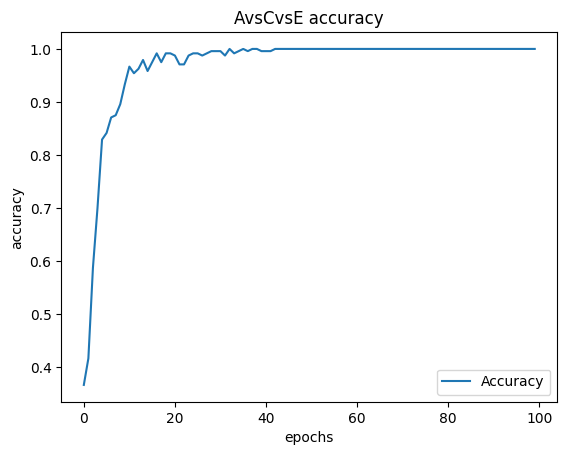

In [45]:
plt.plot(history.history['accuracy'])
plt.title('AvsCvsE accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['Accuracy'],loc='best')
plt.savefig('20-AvsCvsE_Accuracy.png')
plt.show()

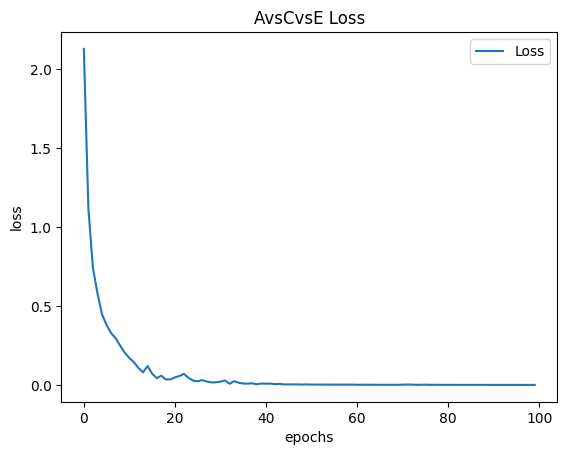

In [46]:
plt.plot(history.history['loss'])
plt.title('AvsCvsE Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['Loss'],loc='best')
plt.savefig('20-AvsCvsE_Loss.png')
plt.show()

In [47]:
y_pred=model.predict(X_test).round()

2/2 [==============================] - 1s 48ms/step


In [48]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 95.00%


In [49]:
y_pred

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0

In [50]:
y_pred=np.argmax(y_pred,axis=1)

In [51]:
y_pred

array([2, 2, 1, 0, 2, 2, 1, 1, 0, 1, 2, 0, 2, 0, 1, 2, 2, 2, 1, 1, 0, 1,
       2, 2, 2, 0, 2, 2, 1, 2, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 2, 2, 1, 2, 1, 1, 2, 0, 2, 2, 0, 0, 1, 1], dtype=int64)

In [52]:
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay

In [53]:
actual=y_test
predicted=y_pred

In [54]:
confusion_matrix = metrics.confusion_matrix(actual, predicted)

In [55]:
confusion_matrix

array([[21,  1,  0],
       [ 0, 15,  1],
       [ 0,  1, 21]], dtype=int64)

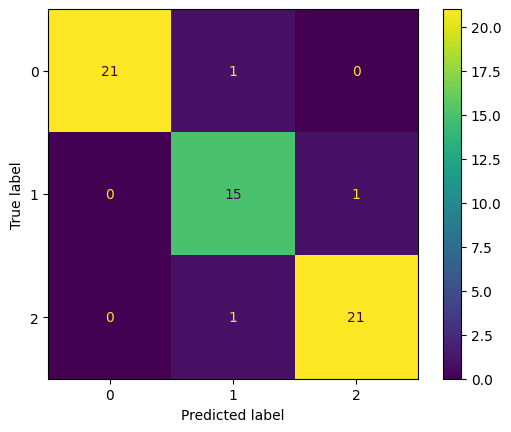

In [56]:
ConfusionMatrixDisplay.from_predictions( y_test, y_pred)
plt.savefig('20-AvsCvsE_ConfusionMatrix.png')
plt.show()

In [57]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        22
           1       0.88      0.94      0.91        16
           2       0.95      0.95      0.95        22

    accuracy                           0.95        60
   macro avg       0.95      0.95      0.95        60
weighted avg       0.95      0.95      0.95        60



In [70]:
from sklearn import metrics
recall_micro = metrics.recall_score(y_test, y_pred, average=None)        
precision_micro = metrics.precision_score(y_test, y_pred, average=None)
print(recall_micro)
print(precision_micro)
f1_micro = metrics.f1_score(y_test, y_pred, average=None)
print(f1_micro)
# accuracy = accuracy_score(y_test,y_pred,average='micro')
# print('Accuracy=',accuracy)
# precision = precision_score(y_test,y_pred)
# print('precision=',precision)
# recall = recall_score(y_test,y_pred)
# print('recall=',recall)
# f1_Score = f1_score(y_test,y_pred)
# print('f1_score=',f1_Score)

[0.95454545 0.9375     0.95454545]
[1.         0.88235294 0.95454545]
[0.97674419 0.90909091 0.95454545]


In [58]:
accuracy = accuracy_score(y_test,y_pred)

In [59]:
precision = precision_score(y_test,y_pred)

ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

In [ ]:
recall = recall_score(y_test,y_pred)

In [ ]:
f1_Score = f1_score(y_test,y_pred)